# `Практикум по программированию на языке Python`

## `Задание 01. Полносвязная нейронная сеть на numpy`.

#### Фамилия, имя: 

Дата выдачи: <span style="color:red">__20 февраля__</span>.

Мягкий дедлайн: <span style="color:red">__6 марта 23:59__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2024`

In [1]:
import numpy as np

## `Теоретическая часть (3 балла)`

В этом блоке вам нужно решить 3 задания.

### `Задание 1. Градиенты для слоя Batch normalization (1.5 балла)`

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma,\delta\in\mathbb{R}$ — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной сети завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__

Перепишем формулу для $y_i$ в векторном виде:
$$y_i = \gamma \frac{X - \mu}{\sqrt{\sigma^2 + \varepsilon}} + \delta $$
Считаем, что $\mathcal{L} = \mathcal{L}(y(X, \gamma, \delta))$, тогда:
1. $\nabla_{\gamma} {\mathcal L} = (\nabla_{y} {\mathcal L})^T \cdot \frac{X - \mu}{\sqrt{\sigma^2 + \varepsilon}}$
2. $\nabla_{\delta} {\mathcal L} = (\nabla_{y} {\mathcal L})^T \cdot (1)_{i=1}^{n} = \sum_{i=1}^n (\nabla_{y} {\mathcal L})_i$
3. $\nabla_{X} {\mathcal L} = \nabla_{y} {\mathcal L} \cdot \frac{\gamma}{\sqrt{\sigma^2 + \varepsilon}}$

### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)`

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__

...

### `Задание 3. Почему функция активации` $ReLU(y) = \max(0, y)$ `предпочтительней сигмоиды` $\sigma(y) = \frac{1}{1 + \exp(-y)}$ `в нейронных сетях? (0.5 балла)`

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__

На практике, зачастую, используются именно глубокие нейронные сети. 
Из курса лекций известно, что $\sup_{y \in \mathbb{R}} \left| \frac{d \, \sigma}{d \, y} (y) \right| = \frac{1}{4}$.
Рассмотрим глубокую сеть с $d$ слоями: ДОПИСАТЬ
Тогда будет наблюдаться затухание градиента

---

## `Практическая часть (7 баллов)`

### `Реализация нейронной сети (3 балла)`

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [2]:
from numpy.typing import NDArray
from typing import Tuple, List, Union

In [4]:
class Layer:
    def __init__(self):
        self.params = []
        self.input = None
        self.inference_mode = True
        
    def forward(self, input: NDArray) -> NDArray:
        raise NotImplementedError("forward method not implemented")
    
    def backward(self, grad_output: NDArray) -> Tuple[NDArray, NDArray]:
        raise NotImplementedError("backward method not implemented")
    
    def __call__(self, input: NDArray) -> NDArray:
        return self.forward(input)

In [5]:
class IdentityLayer(Layer):
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:           
    output = layer.forward(input)

    - Propagate gradients through itself:    
    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters.

    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """
        Here you can initialize layer parameters (if any) 
        and auxiliary stuff. You should enumerate all parameters
        in self.params
        """
        # An identity layer does nothing
        self.params = []
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], 
        returns output data [batch, output_units]
        """
        # An identity layer just returns whatever it gets as input.
        self.input = input
        return input

    def backward(self, grad_output): 
        """
        Performs a backpropagation step through the layer, 
        with respect to the given input.

        To compute loss gradients w.r.t input, 
        you need to apply chain rule (backprop):

        d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

        Luckily, you already receive d `loss` / d `layer` in argument, 
        so you only need to multiply it by d `layer` / d `input`.

        NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
        So it's better to write down the `loss` differential and extract
        d `layer` / d `input` from it so that only 2D tensors were present.

        The method returns:
        * gradient w.r.t input (will be passed to 
          previous layer's backward method)
        * flattened gradient w.r.t. parameters (with .ravel() 
          applied to each gradient). 
          If there are no params, return []
        """
        # The gradient of an identity layer is precisely grad_output
        input_dim = self.input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input), [] # chain rule

#### `Слой нелинейности ReLU`

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [6]:
class ReLU(Layer):
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        super().__init__()

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        
        self.input = input        
        return np.maximum(0, input)
        
        
    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        
        if self.input is None:
            raise RuntimeError('Call forward method before calling backward')
        
        return np.where(self.input > 0, grad_output, np.zeros_like(self.input)), []
    
    def __repr__(self):
        return 'Relu()'

#### `Полносвязный слой`

Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [7]:
# example
np.r_[np.eye(3).ravel(), np.arange(4)]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [8]:
class Dense(Layer):
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        super().__init__()
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = x W + b
        
        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        
        self.input = input
        
        return input @ self.weights + self.biases

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]
        
        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]
        """
        
        # print(f"DEBUG: {(self.input[:, :, None] @ grad_output[:, None, :]).shape=}")
        d_loss_d_w = np.sum(self.input[:, :, None] @ grad_output[:, None, :], axis=0)
        d_loss_d_b = np.sum(grad_output, axis=0)
        d_loss_d_x = grad_output @ self.weights.T
        
        return d_loss_d_x, np.r_[d_loss_d_w.ravel(), d_loss_d_b.ravel()]
    
    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

#### `Проверка градиента`

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [9]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке:
Пусть $x = (x_1, \ldots, x_n)$

$$ f(x) = \sum_i \left( ReLU(x) \right)_i = \sum_i max(0, x_i)$$
$$f: \mathbb{R} ^ {n \times m} \to \mathbb{R}^{m}$$

$$\nabla_{x} f = \chi (x), \text{где } \chi (s) = \begin{cases} 1 \; & s > 0 \\ 0 \; & s \le 0 \end{cases}$$

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [11]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

def foo(x):
    out = relu.forward(x)
    return np.sum(out, axis=1)

foo(points)
grads = relu.backward(np.ones((10, 12)))[0]

numeric_grads = np.zeros_like(points)
for i in range(points.shape[0]):
    numeric_grads[i, :] = eval_numerical_gradient(foo, points[i, :].reshape((1, -1)), verbose=False)

print(f"{grads.shape=}\t{numeric_grads.shape=}")

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

grads.shape=(10, 12)	numeric_grads.shape=(10, 12)


Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$):

$$f(x) = <W x + b, \mathbb{I}> = <W^{T} \mathbb{I}, x> + <\mathbb{I}, b>$$
$$\nabla_x f = W^{T} \mathbb{I} = \left(\sum_{j=1}^{n} w_{ij} \right)_{i=1}^{m} $$

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [13]:
linear = Dense(12, 32)
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

def foo(x):
    out = linear.forward(x)
    return np.sum(out, axis=1)

foo(points)
grads = linear.backward(np.ones((10, 32)))[0]

numeric_grads = np.zeros_like(points)
for i in range(10):
    numeric_grads[i, :] = eval_numerical_gradient(foo, points[i, :].reshape((1, -1)), verbose=False)

print(f"{grads.shape=}\t{numeric_grads.shape=}")

# grads - numeric_grads

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0), np.max(np.abs(grads - numeric_grads))

grads.shape=(10, 12)	numeric_grads.shape=(10, 12)


#### `Реализация softmax-слоя и функции потерь`

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

**Пожелание.** Постарайтесь максимально упростить формулу градиентов, чтобы получился лаконичный и стабильный код. Большие и страшные реализации часто оказываются нестабильными.

In [14]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [81]:
class LogSoftmax(Layer):
    def __init__(self):
        super().__init__()
        self.output = None

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        self.output = input - logsumexp(input, axis=-1, keepdims=True)
        
        return self.output
        
    def backward(self, grad_output):
        """
        Propagartes gradients.
        Assumes that each row of grad_output contains only 1 
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """
        
        if self.output is None:
            raise RuntimeError('Call forward method before calling backward')
        
        grad_output_sum = np.sum(grad_output, axis=-1, keepdims=True)        
        d_loss_d_x_2 = grad_output - grad_output_sum * np.exp(self.output)
        
        return d_loss_d_x_2, []
        
    
    def __repr__(self):
        return 'LogSoftmax()'

Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [20]:
def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    
    return -np.mean(activations[np.arange(len(target)), target])


def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    each arg has shape [batch, num_classes]
    output shape: [batch, num-classes]
    """
    
    ohe_target = np.zeros_like(activations)
    ohe_target[np.arange(len(target)), target] = 1
    
    return -ohe_target / len(target)

Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [21]:
n = 50
d = 10
lsm = LogSoftmax()
np.random.seed(42)
target = np.random.choice(d, size=n)
points = np.random.uniform(-1, 1, n*d).reshape([n, d])

def foo(x):
    return NLL(lsm.forward(x), target)

pred = lsm.forward(points)
NLL(pred, target)
grads, _ = lsm.backward(grad_NLL(pred, target))

numeric_grads = eval_numerical_gradient(foo, points, verbose=False)

print(f"Max deviation: {np.max(np.abs(grads - numeric_grads))}")

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

Max deviation: 3.1168190424424314e-11


### `Загрузка данных`

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from sklearn.datasets import load_digits

In [25]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

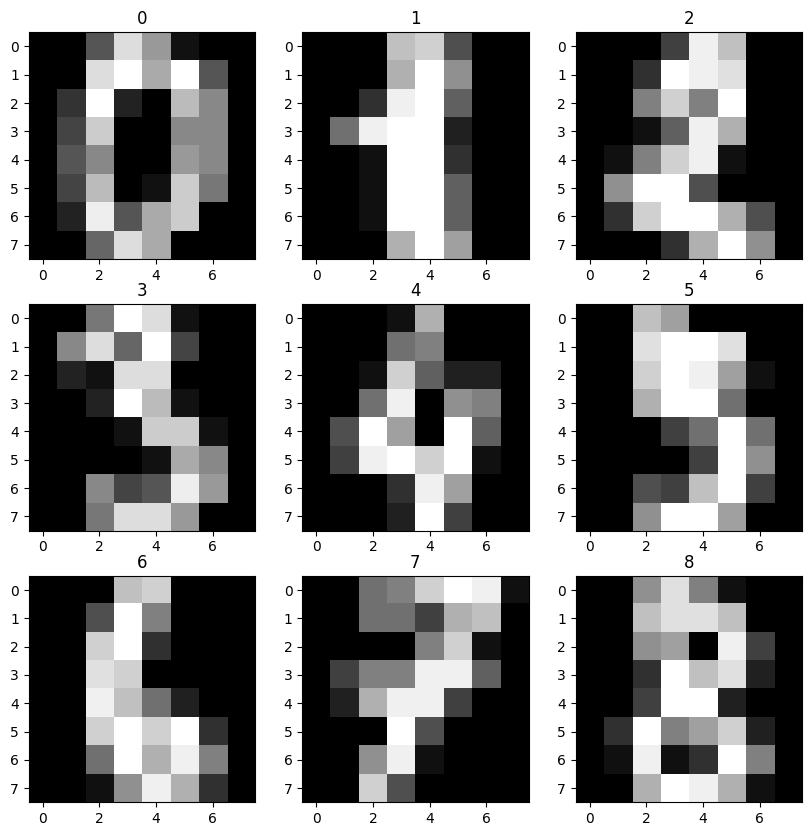

In [29]:
_, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i in range(9):
    ax[divmod(i, 3)].imshow(X[i, :].reshape((8, 8)), cmap=plt.get_cmap("gray"))
    ax[divmod(i, 3)].set_title(y[i])

### `Сборка и обучение нейронной сети (0.8 балла)`

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [30]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [31]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [32]:
def forward(network: List[Layer], X):
    """
    Perform forward pass through the network.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: 
    output shape: [batch, out_features_num]
    """
    
    for layer in network:
        X = layer.forward(X)
    
    return X

Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [33]:
def predict(network: List[Layer], X):
    """
    Returns predictions for each object in X.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    
    pred = forward(network, X)
    
    return np.argmax(pred, axis=1, keepdims=True)

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [34]:
from scipy.optimize import minimize

In [35]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [36]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [65]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]
    
    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)
    
    Do not forget to set weights of the network!
    """
    network, X, y = args
    
    set_weights(weights, network)
    
    activations = forward(network, X)
    loss = NLL(activations, y)
    
    weights_grad_arrays = []
    
    d_loss_d_input = grad_NLL(activations, y)
    for layer in reversed(network):
        d_loss_d_input, d_loss_d_layer = layer.backward(d_loss_d_input)
        weights_grad_arrays.append(d_loss_d_layer)
    
    weights_grad = np.r_[*reversed(weights_grad_arrays)]
    
    # print(f"{len(weights_grad_arrays)=}\t\t{len(weights_grad)}")
    # print(f"Mean abs grad value: {np.mean(np.abs(weights_grad))}\tMax abs grad value: {np.max(np.abs(weights_grad))}")
    # print(f"Loss = {loss}")
    
    return loss, np.array(weights_grad)

In [66]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5])

np.r_[*[arr1, arr2]]

array([1, 2, 3, 4, 5])

Теперь мы готовы обучать нашу нейросеть. 

In [67]:
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
weights = get_weights(network)
weights

array([-0.0029614 , -0.00123379,  0.0086766 , ...,  0.        ,
        0.        ,  0.        ])

In [68]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                # optimization method
    jac=True,                         # says that gradient is computed in fun,
    options={'disp': True},
    tol=1e-6
)

In [69]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [70]:
res["nit"] # number of iterations (should be >> 10)

98

In [71]:
res["success"] # should be True

True

In [72]:
res["message"]

'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'

In [73]:
res["x"] # leraned weights

array([-2.96139580e-03, -1.23378910e-03,  8.67660141e-03, ...,
       -5.02186235e-01, -1.37824542e+00,  2.20365860e-02])

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

In [76]:
set_weights(weights=res["x"], network=network)

train_NLL = NLL(forward(network, X_train), y_train)
test_NLL = NLL(forward(network, X_test), y_test)

print(f"Train NLL: {train_NLL:.7f}\t\tTest NLL: {test_NLL:.7f}")

train_accuracy = accuracy_score(y_true=y_train, y_pred=predict(network, X_train))
test_accuracy = accuracy_score(y_true=y_test, y_pred=predict(network, X_test))

print(f"Train accuracy: {train_accuracy:.3f}\t\tTest accuracy: {test_accuracy:.3f}")

Train NLL: 0.0000029		Test NLL: 0.7917646
Train accuracy: 1.000		Test accuracy: 0.953


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [82]:
def set_inference_mode(network: List[Layer], inference_mode: bool):  # toggle the inference_mode flag of some layers such as Dropout and BatchNorm
    for layer in network:
        layer.inference_mode = inference_mode

def get_inference_modes_list(network: List[Layer]) -> List[bool]:
    return list(map(lambda layer: layer.inference_mode, network))

def set_inference_mode_by_list(network: List[Layer], inference_modes_list: List[bool]):
    for layer, mode in zip(network, inference_modes_list):
        layer.inference_mode = mode

In [83]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False, control_inference_mode: bool = True):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.control_inference_mode = control_inference_mode
        self.train_acc = []
        self.test_acc = []
        self.train_NLL = []
        self.test_NLL = []
        
    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        
        if self.control_inference_mode:
            modes_ls = get_inference_modes_list(self.network)
        
        train_NLL = NLL(forward(self.network, X_train), y_train)
        test_NLL = NLL(forward(self.network, X_test), y_test)
        
        train_accuracy = accuracy_score(y_true=y_train, y_pred=predict(network, X_train))
        test_accuracy = accuracy_score(y_true=y_test, y_pred=predict(network, X_test))
        
        if self.control_inference_mode:
            set_inference_mode_by_list(self.network, modes_ls)
        
        self.train_acc.append(train_accuracy)
        self.test_acc.append(test_accuracy)
        self.train_NLL.append(train_NLL)
        self.test_NLL.append(test_NLL)
        
        if self.print:
            print(f"Train accuracy: {train_accuracy:.3f}\t\tTest accuracy: {test_accuracy:.3f}")

In [85]:
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = minimize(
    compute_loss_grad, weights,  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb.call,
    tol=1e-8,
)

Train accuracy: 0.191		Test accuracy: 0.171
Train accuracy: 0.137		Test accuracy: 0.127
Train accuracy: 0.148		Test accuracy: 0.140
Train accuracy: 0.220		Test accuracy: 0.249
Train accuracy: 0.202		Test accuracy: 0.222
Train accuracy: 0.213		Test accuracy: 0.233
Train accuracy: 0.301		Test accuracy: 0.311
Train accuracy: 0.329		Test accuracy: 0.322
Train accuracy: 0.317		Test accuracy: 0.280
Train accuracy: 0.475		Test accuracy: 0.429
Train accuracy: 0.582		Test accuracy: 0.527
Train accuracy: 0.627		Test accuracy: 0.580
Train accuracy: 0.673		Test accuracy: 0.631
Train accuracy: 0.690		Test accuracy: 0.624
Train accuracy: 0.707		Test accuracy: 0.647
Train accuracy: 0.725		Test accuracy: 0.673
Train accuracy: 0.755		Test accuracy: 0.707
Train accuracy: 0.784		Test accuracy: 0.749
Train accuracy: 0.794		Test accuracy: 0.753
Train accuracy: 0.806		Test accuracy: 0.769
Train accuracy: 0.833		Test accuracy: 0.800
Train accuracy: 0.857		Test accuracy: 0.820
Train accuracy: 0.867		Test accu

Изобразите на графике кривую качества на обучени и контроле по итерациям:

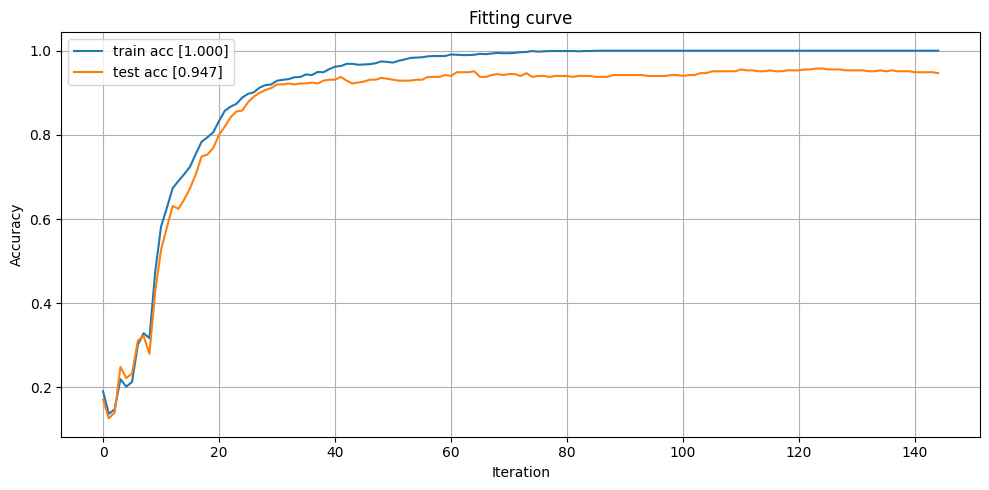

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label=f"train acc [{cb.train_acc[-1]:4.3f}]")
ax.plot(cb.test_acc, label=f"test acc [{cb.test_acc[-1]:4.3f}]")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.set_title("Fitting curve")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Эксперименты с числом слоев (0.6 балла)`

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [89]:
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

In [137]:
def train_network(network: List[Layer], history: bool = False, optimizer="L-BFGS-B", options: dict = None, tol: float = 1e-7, cb_print: bool = False) -> List[Layer]:
    cb = Callback(network, X_train, y_train, X_test, y_test, print=cb_print) if history else lambda *args: None
    options = dict() if options is None else options

    weights = get_weights(network)
    res = minimize(
        compute_loss_grad, weights,  
        args=[network, X_train, y_train], 
        method=optimizer,
        jac=True,
        callback=cb.call if history else None,
        options=options,
        tol=tol
    )
    
    if not res["success"]:
        raise RuntimeError(f"Optimization failure: {res['message']}")
    
    if history:
        return network, cb
    else:
        return network

In [94]:
accs_train = np.zeros((5, 15))
accs_test = np.zeros_like(accs_train)

In [95]:
np.random.seed(42)

for i, layer_c in zip(range(5), range(1, 5+1)):
    for j in range(accs_train.shape[1]):
        print(f"{i=:2}\t{j=:2}\t{layer_c=}\t", end='')
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        network, cb = train_network(network, history=True)
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]
        print(f"train acc: {accs_train[i, j]:5.4f} test acc: {accs_test[i, j]:5.4f}")

i= 0	j= 0	layer_c=1	train acc: 1.0000 test acc: 0.9422
i= 0	j= 1	layer_c=1	train acc: 1.0000 test acc: 0.9489
i= 0	j= 2	layer_c=1	train acc: 1.0000 test acc: 0.9489
i= 0	j= 3	layer_c=1	train acc: 1.0000 test acc: 0.9511
i= 0	j= 4	layer_c=1	train acc: 1.0000 test acc: 0.9533
i= 0	j= 5	layer_c=1	train acc: 1.0000 test acc: 0.9422
i= 0	j= 6	layer_c=1	train acc: 1.0000 test acc: 0.9556
i= 0	j= 7	layer_c=1	train acc: 1.0000 test acc: 0.9356
i= 0	j= 8	layer_c=1	train acc: 1.0000 test acc: 0.9489
i= 0	j= 9	layer_c=1	train acc: 1.0000 test acc: 0.9467
i= 0	j=10	layer_c=1	train acc: 1.0000 test acc: 0.9511
i= 0	j=11	layer_c=1	train acc: 1.0000 test acc: 0.9356
i= 0	j=12	layer_c=1	train acc: 1.0000 test acc: 0.9444
i= 0	j=13	layer_c=1	train acc: 1.0000 test acc: 0.9467
i= 0	j=14	layer_c=1	train acc: 1.0000 test acc: 0.9489
i= 1	j= 0	layer_c=2	train acc: 1.0000 test acc: 0.9533
i= 1	j= 1	layer_c=2	train acc: 1.0000 test acc: 0.9711
i= 1	j= 2	layer_c=2	train acc: 1.0000 test acc: 0.9600
i= 1	j= 3	

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

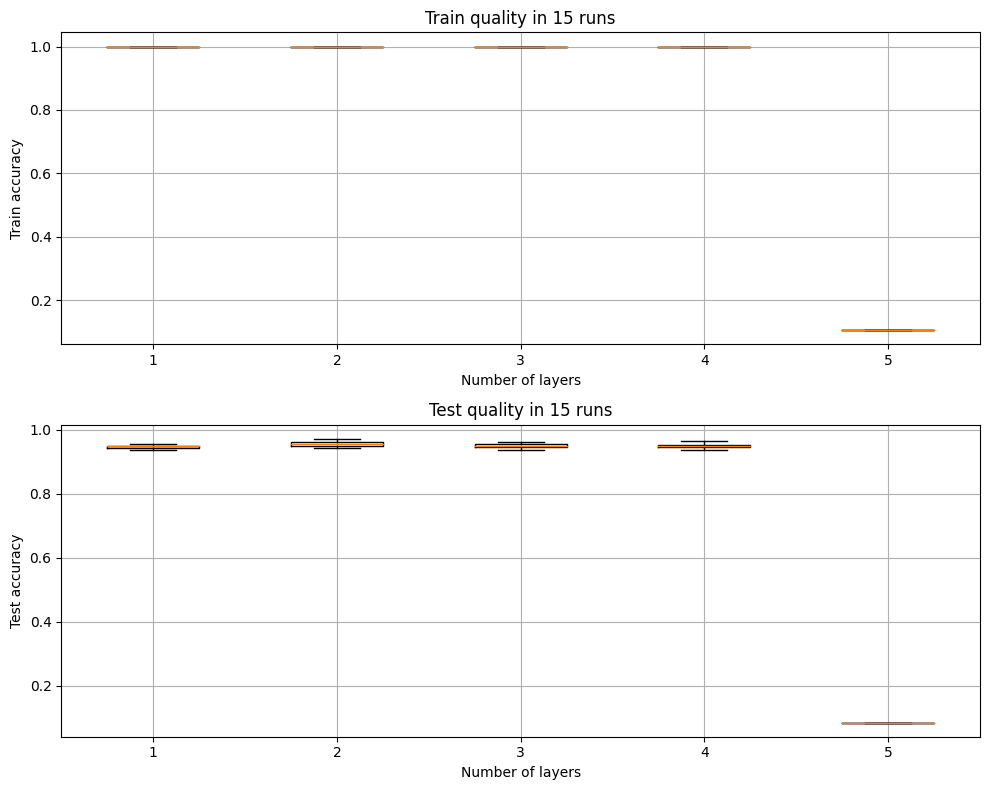

In [93]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title(f"Train quality in {accs_train.shape[1]} runs")
axes[1].set_title(f"Test quality in {accs_train.shape[1]} runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__

Линейная модель дает качество хуже, чем нелинейные модели. 

На обучающей выборке модели стабильно получают точность, сравнимую с 1.
На валидационной выборке модели получают качество на несколько процентов хуже, чем на тренировочной. 

Оптимальное число слоев --- 3 или 4 слоя. 
При числе слоёв > 4 начинает усиляться переобучение

### `Эксперименты c различными инициализациями весов (0.6 балла)`

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [96]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                sigma = 2 / layer.weights.shape[0]
                layer.weights = np.random.normal(loc=0, scale=sigma, size=layer.weights.shape)
                
            elif initialization == 'Xavier':
                sigma = np.sqrt(2 / (layer.weights.shape[0] + layer.weights.shape[1]))
                layer.weights = np.random.normal(loc=0, scale=sigma, size=layer.weights.shape)
                
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
                
            layer.biases = np.zeros_like(layer.biases)
            
            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

#### `3 слоя`

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [97]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [98]:
accs_train = np.zeros((5, 15))
accs_test = np.zeros_like(accs_test)

In [100]:
np.random.seed(42)
layer_c = 3

for i, initialization in enumerate(init_vars):
    for j in range(accs_train.shape[1]):
        print(f"{i=:2}\t{j=:2}\t{initialization=}\t", end='')
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        initialize_network(network, initialization)
        network, cb = train_network(network, history=True)
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]
        print(f"train acc: {accs_train[i, j]:5.4f} test acc: {accs_test[i, j]:5.4f} n_iter: {len(cb.train_acc)}")

i= 0	j= 0	initialization=0.001	train acc: 1.0000 test acc: 0.9422 n_iter: 143
i= 0	j= 1	initialization=0.001	train acc: 1.0000 test acc: 0.9578 n_iter: 105
i= 0	j= 2	initialization=0.001	train acc: 0.1656 test acc: 0.1711 n_iter: 5
i= 0	j= 3	initialization=0.001	train acc: 0.2613 test acc: 0.2311 n_iter: 5
i= 0	j= 4	initialization=0.001	train acc: 1.0000 test acc: 0.9578 n_iter: 114
i= 0	j= 5	initialization=0.001	train acc: 1.0000 test acc: 0.9556 n_iter: 102
i= 0	j= 6	initialization=0.001	train acc: 1.0000 test acc: 0.9467 n_iter: 142
i= 0	j= 7	initialization=0.001	train acc: 1.0000 test acc: 0.9511 n_iter: 122
i= 0	j= 8	initialization=0.001	train acc: 1.0000 test acc: 0.9533 n_iter: 140
i= 0	j= 9	initialization=0.001	train acc: 0.1529 test acc: 0.1378 n_iter: 4
i= 0	j=10	initialization=0.001	train acc: 1.0000 test acc: 0.9489 n_iter: 118
i= 0	j=11	initialization=0.001	train acc: 0.1500 test acc: 0.1444 n_iter: 4
i= 0	j=12	initialization=0.001	train acc: 1.0000 test acc: 0.9600 n_iter

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

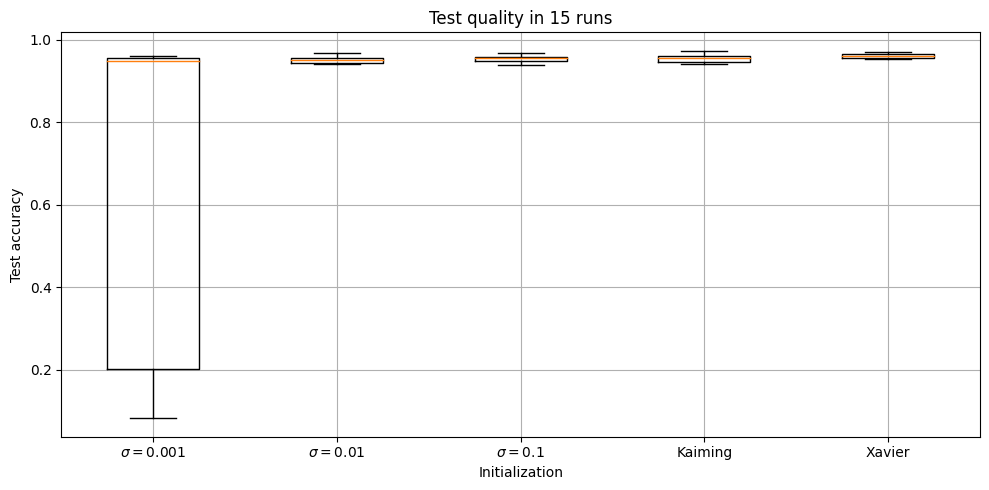

In [101]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title(f"Test quality in {accs_test.shape[1]} runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `4 слоя`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [102]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [103]:
accs_train = np.zeros((5, 15))
accs_test = np.zeros_like(accs_train)

In [104]:
np.random.seed(42)
layer_c = 4

for i, initialization in enumerate(init_vars):
    for j in range(accs_train.shape[1]):
        print(f"{i=:2}\t{j=:2}\t{initialization=}\t", end='')
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        initialize_network(network, initialization)
        network, cb = train_network(network, history=True)
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]
        print(f"train acc: {accs_train[i, j]:5.4f} test acc: {accs_test[i, j]:5.4f} n_iter: {len(cb.train_acc)}")

i= 0	j= 0	initialization=0.005	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 1	initialization=0.005	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 2	initialization=0.005	train acc: 0.0987 test acc: 0.0978 n_iter: 6
i= 0	j= 3	initialization=0.005	train acc: 1.0000 test acc: 0.9578 n_iter: 172
i= 0	j= 4	initialization=0.005	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 5	initialization=0.005	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 6	initialization=0.005	train acc: 0.1544 test acc: 0.1378 n_iter: 5
i= 0	j= 7	initialization=0.005	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 8	initialization=0.005	train acc: 1.0000 test acc: 0.9556 n_iter: 123
i= 0	j= 9	initialization=0.005	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j=10	initialization=0.005	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j=11	initialization=0.005	train acc: 1.0000 test acc: 0.9467 n_iter: 158
i= 0	j=12	initialization=0.005	train acc: 1.0000 test acc: 0.9489 n_iter: 190
i= 0

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

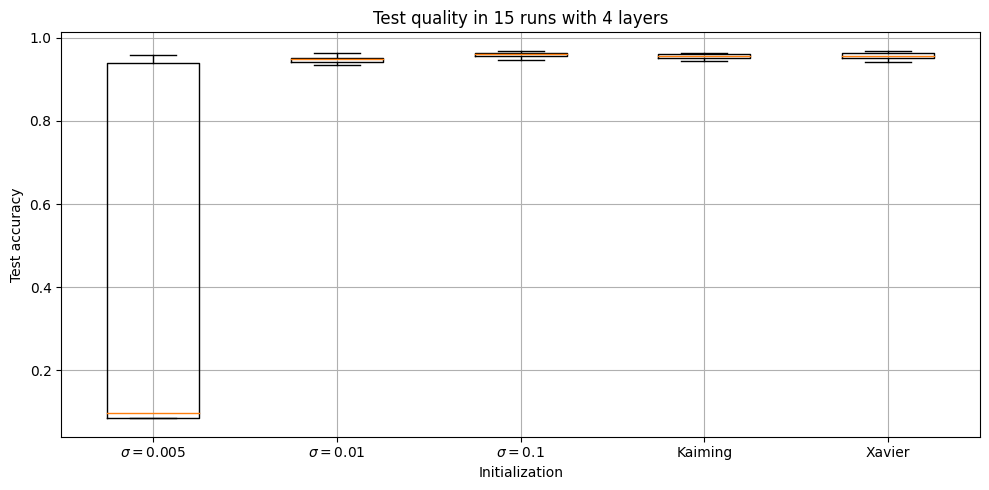

In [105]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title(f"Test quality in {accs_test.shape[1]} runs with 4 layers")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `5 слоев`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [106]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [107]:
accs_train = np.zeros((5, 15))
accs_test = np.zeros_like(accs_train)

In [108]:
np.random.seed(42)
layer_c = 5

for i, initialization in enumerate(init_vars):
    for j in range(accs_train.shape[1]):
        print(f"{i=:2}\t{j=:2}\t{initialization=}\t", end='')
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        initialize_network(network, initialization)
        network, cb = train_network(network, history=True)
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]
        print(f"train acc: {accs_train[i, j]:5.4f} test acc: {accs_test[i, j]:5.4f} n_iter: {len(cb.train_acc)}")

i= 0	j= 0	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 1	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 2	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 3	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 4	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 5	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 6	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 7	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 2
i= 0	j= 8	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j= 9	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j=10	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j=11	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j=12	initialization=0.01	train acc: 0.1062 test acc: 0.0844 n_iter: 3
i= 0	j=13	initialization=

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

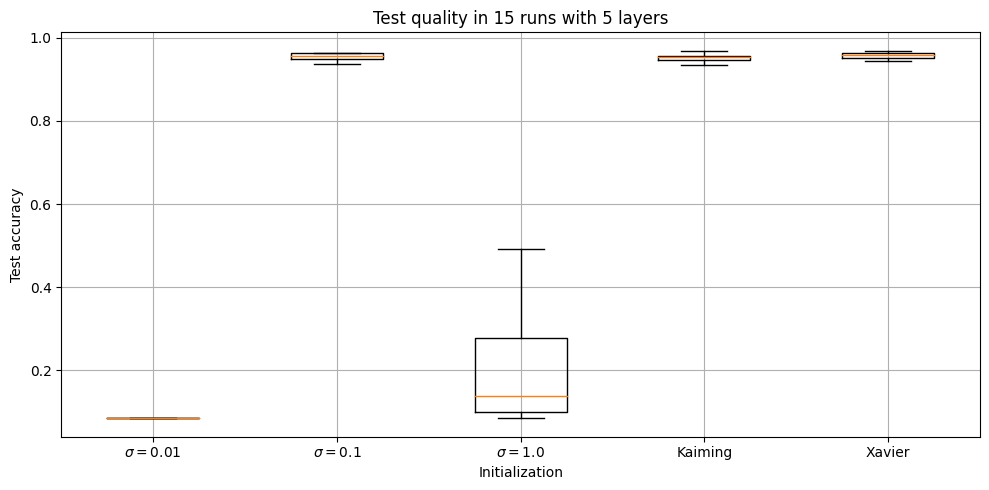

In [109]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title(f"Test quality in {accs_test.shape[1]} runs with {5} layers")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__

...

Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [110]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [111]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [112]:
np.random.seed(42)
layer_c = 4

for i, initialization in enumerate(init_vars):
    print(f"{i=}\t{initialization=}")
    network = make_network(input_size, 32, output_size, layer_c, ReLU)
    initialize_network(network, initialization)
    network, cb = train_network(network, history=True)
    
    accs_test_on_iterations.append(cb.train_acc)
    accs_train_on_iterations.append(cb.test_acc)

i=0	initialization=0.001
i=1	initialization=0.01
i=2	initialization=0.1
i=3	initialization='Kaiming'
i=4	initialization='Xavier'


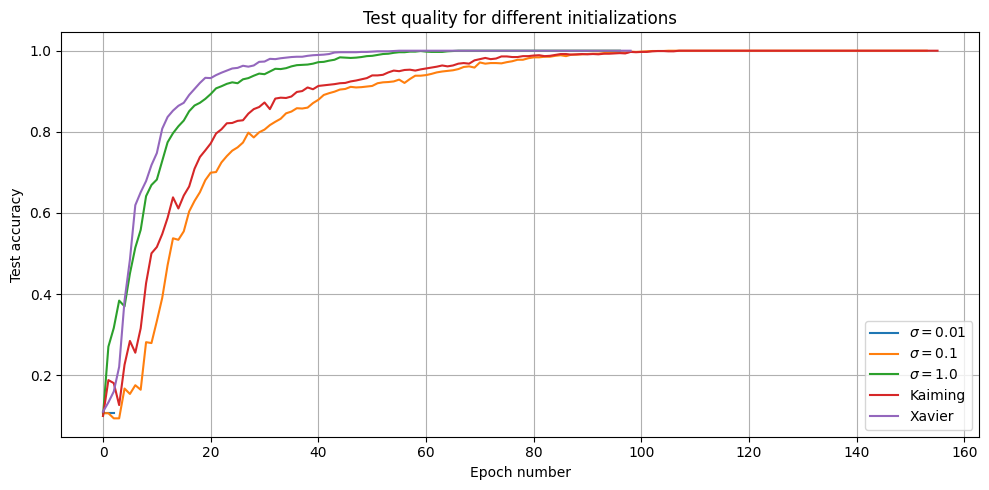

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for idx, label in enumerate(init_vars_for_plot):
    ax.plot(accs_test_on_iterations[idx], label=label)

ax.set_title("Test quality for different initializations")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Test accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость обучения в зависимости от выбранной инициализации?

__Ответы:__

Наилучшая скорость сходимости достигается при использовании инициализации Xavier. 
При использовании слишком инициализации со слишком малой дисперсией происходит затухание градиентов. 
При использовании неоптимальных значений дисперсии скорость обучения заметно замедляется. 

### `Эксперименты c различными функциями активации (0.6 балла)`

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [153]:
class Tanh(Layer):
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        super().__init__()

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        self.cosh = np.cosh(input)
        return np.sinh(input) / self.cosh

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return -grad_output / np.power(self.cosh, 2), []

    def __repr__(self):
        return 'Tanh()'

In [154]:
from scipy.special import expit
    
class Sigmoid(Layer):
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        super().__init__()
        self.output = None

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        self.output = expit(input)
        return self.output

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return self.output * (1 - self.output) * grad_output, []

    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [162]:
act_func_vars = [Tanh, Sigmoid, ReLU]
init_for_act_funcs = ['Xavier', 'Xavier', 'Kaiming']

In [163]:
accs_train = np.zeros((3, 15))
accs_test = np.zeros_like(accs_train)
layer_c = 3

In [167]:
np.random.seed(42)

for i, (act_func, init_strategy) in enumerate(zip(act_func_vars, init_for_act_funcs)):
    for j in range(accs_train.shape[1]):
        print(f"{i=:2}\t{j=:2}\tactivation={act_func()}\t", end='')
        network = make_network(input_size, 32, output_size, layer_c, act_func)
        # print(network)
        initialize_network(network, init_strategy)
        network, cb = train_network(network, history=True)
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]
        print(f"train acc: {accs_train[i, j]:5.4f} test acc: {accs_test[i, j]:5.4f} n_iter: {len(cb.train_acc)}")

i= 0	j= 0	activation=Tanh()	

RuntimeError: Optimization failure: ABNORMAL_TERMINATION_IN_LNSRCH

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

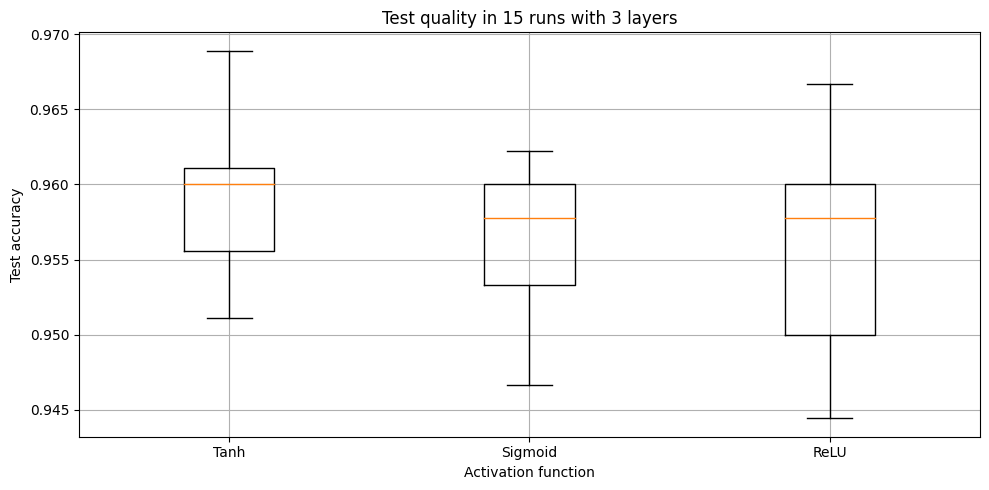

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=act_func_vars, showfliers=False)

ax.set_title(f"Test quality in {accs_train.shape[1]} runs with {layer_c} layers")
ax.set_xlabel("Activation function")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__

При использовании в качестве функций активации сигмоиды и гиперболического тангенса среднее качество оказывается сравнимым. Однако, дисперсия при использовании сигмоиды оказывается выше. 
При использовании ReLU среднее качество оказывается ниже.

Преимущества ReLU не реализуются при малом количестве слоев (3), так как затухание градиентов оказывается незначительным. 
Для проверки данной гипотезы будет поставлен *дополнительный* эксперимент с количеством слоев = 5

In [124]:
accs_train = np.zeros((3, 15))
accs_test = np.zeros_like(accs_train)
layer_c = 10

In [125]:
np.random.seed(42)

for i, (act_func, init_strategy) in enumerate(zip(act_func_vars, init_for_act_funcs)):
    for j in range(accs_train.shape[1]):
        print(f"{i=:2}\t{j=:2}\t{act_func=}\t", end='')
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        initialize_network(network, init_strategy)
        network, cb = train_network(network, history=True)
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]
        print(f"train acc: {accs_train[i, j]:5.4f} test acc: {accs_test[i, j]:5.4f} n_iter: {len(cb.train_acc)}")

i= 0	j= 0	act_func='Tanh'	train acc: 1.0000 test acc: 0.9244 n_iter: 174
i= 0	j= 1	act_func='Tanh'	train acc: 1.0000 test acc: 0.9578 n_iter: 145
i= 0	j= 2	act_func='Tanh'	train acc: 1.0000 test acc: 0.9444 n_iter: 286
i= 0	j= 3	act_func='Tanh'	train acc: 1.0000 test acc: 0.9578 n_iter: 172
i= 0	j= 4	act_func='Tanh'	train acc: 1.0000 test acc: 0.9467 n_iter: 165
i= 0	j= 5	act_func='Tanh'	train acc: 1.0000 test acc: 0.9444 n_iter: 182
i= 0	j= 6	act_func='Tanh'	train acc: 1.0000 test acc: 0.9311 n_iter: 215
i= 0	j= 7	act_func='Tanh'	train acc: 1.0000 test acc: 0.9556 n_iter: 216
i= 0	j= 8	act_func='Tanh'	train acc: 1.0000 test acc: 0.9467 n_iter: 431
i= 0	j= 9	act_func='Tanh'	train acc: 1.0000 test acc: 0.9111 n_iter: 478
i= 0	j=10	act_func='Tanh'	train acc: 1.0000 test acc: 0.9333 n_iter: 210
i= 0	j=11	act_func='Tanh'	train acc: 1.0000 test acc: 0.9333 n_iter: 215
i= 0	j=12	act_func='Tanh'	train acc: 1.0000 test acc: 0.9444 n_iter: 146
i= 0	j=13	act_func='Tanh'	train acc: 1.0000 test ac

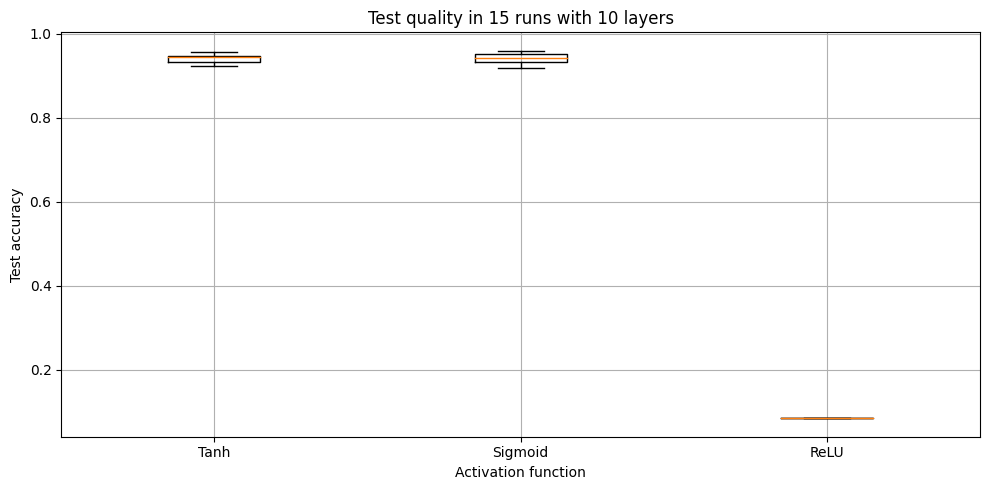

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=act_func_vars, showfliers=False)

ax.set_title(f"Test quality in {accs_train.shape[1]} runs with {layer_c} layers")
ax.set_xlabel("Activation function")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

### `Реализация метода оптимизации (1.4 балла)`

В этой части задания реализуйте метод оптимизации SGD + momentum. Упрощённая версия более общего алгоритма [отсюда](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

$$
\begin{aligned}
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: X \text{ (data)},       \\
    &\hspace{13mm} \: f(\theta) \text{ (objective)}, \:\mu \text{ (momentum)}       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{5mm}\mathcal{X} \leftarrow \texttt{list\_of\_random\_batches}(X)\\
    &\hspace{5mm}\textbf{for} \: i=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{10mm}g_t\leftarrow   \nabla_{\theta} f_t (\theta_{t-1},\mathcal{X}_i)      \\
    &\hspace{10mm}\textbf{if} \: \mu \neq 0                                          \\
    &\hspace{15mm}\textbf{if} \: t > 1                                              \\
    &\hspace{20mm} \textbf{b}_t \leftarrow \mu \textbf{b}_{t-1} + g_t               \\
    &\hspace{15mm}\textbf{else}                                                     \\
    &\hspace{20mm} \textbf{b}_t \leftarrow g_t                                      \\
    &\hspace{15mm} g_t  \leftarrow  \textbf{b}_t                                     \\
    &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma g_t                      \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
    &\bf{return} \:  \theta_t                                                       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
\end{aligned}
$$

Проще всего будет написать `custom minimizer` (смотри [документацию scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

In [127]:
from scipy.optimize import OptimizeResult


def SGD(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    mu = kwargs['momentum']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']
    tolerance = kwargs['tol'] if 'tol' in kwargs else None
    tolerance = -1.0 if tolerance is None else tolerance
    
    if isinstance(args, tuple) and (len(args) == 1):
        args = args[0]
    
    net, X, y = args
    
    m = 0.0
    weights = x0
    nit = 0
    msg = "Max iterations reached"
    indxs = np.arange(X.shape[0])
    
    for i in range(n_iter):
        np.random.shuffle(indxs)
        batch_indxs = np.array_split(indxs, X.shape[0] // batch_size)
        loss_sum = 0.0
        
        for batch_ind in batch_indxs:
            loss = fun(weights, (net, X[batch_ind, :], y[batch_ind]))
            grad = fun.derivative(weights, (net, X[batch_ind, :], y[batch_ind]))
            m = mu * m + grad
            weights -= gamma * m
            loss_sum += loss
        
        if callback is not None:
            callback(weights)
        
        nit += 1
        loss_sum /= len(batch_indxs)
        if loss_sum <= tolerance:
            msg = f"Convergence: loss ({loss_sum}) <= tolerance ({tolerance})"
            break
    
    res = {
        "message": msg,
        "success": True,
        "nit": nit,
        "x": weights
    }
    
    return res

**Задание 1. (0.5 балла)** Продемонстрируйте правильную работу метода оптимизации, получив `test_accuracy>=0.9`.

In [128]:
layer_c = 3
network = make_network(input_size, 32, output_size, layer_c, ReLU)
weights = get_weights(network)

res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=(network, X_train, y_train), # args passed to fun
    method=SGD,                       # optimization method
    jac=True,                         # says that gradient is computed in fun,
    options={
        'n_iter': 1_250,
        'momentum': 0.9,
        'lr': 1e-2,
        'batch_size': 100,
    },
    tol=1e-3,
)

res['message'], res['nit']

('Convergence: loss (0.0009742639215607785) <= tolerance (0.001)', 159)

In [129]:
train_NLL = NLL(forward(network, X_train), y_train)
test_NLL = NLL(forward(network, X_test), y_test)

print(f"Train NLL: {train_NLL:.7f}\t\tTest NLL: {test_NLL:.7f}")

train_accuracy = accuracy_score(y_true=y_train, y_pred=predict(network, X_train))
test_accuracy = accuracy_score(y_true=y_test, y_pred=predict(network, X_test))

print(f"Train accuracy: {train_accuracy:.3f}\t\tTest accuracy: {test_accuracy:.3f}")

Train NLL: 0.0009526		Test NLL: 0.2621051
Train accuracy: 1.000		Test accuracy: 0.958


**Задание 2. (0.8 балла)** Сравните три алгоритма:
1. LBFGS-B
2. SGD
3. SGD + momentum

Для этого одновременно переберите следующие гиперпараметры:
- значения `lr` на отрезке `[1e-3, 1e-1]` по логарифмической сетке
- два значения `momentum`: `0` и `0.9`
- значения `batch_size`: `8` и `32`

В каждом запуске сохраняйте три метрики: итоговое accuracy на тесте и на трейне и время обучения.

Для каждого из трёх алгоритмов выберите лучшие `lr` и `batch_size` по `test_accuracy`. Постройте для них кривые обучения (пример ниже). Сделайте выводы.

![](comparison.svg)

In [174]:
optimizer = SGD
optimizer_params = []

for lr in np.logspace(-1, -3, num=7, base=10):
    for batch_size in [9, 32]:
        optimizer_params.append({
            'n_iter': 250,
            'momentum': 0.0,
            'lr': lr,
            'batch_size': batch_size,
        })


accs_train = np.zeros((len(optimizer_params), 15))
accs_test = np.zeros_like(accs_train)
layer_c = 3
np.random.seed(42)



for i, opt_params in enumerate(optimizer_params):
    for j in range(accs_train.shape[1]):
        print(f"{i=:2}\t{j=:2}\tlr={opt_params['lr']:.5f}", end='')
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        initialize_network(network, "Kaiming")
        network = train_network(
            network, 
            history=False, 
            optimizer=optimizer,
            options=opt_params,
        )
        
        accs_train[i, j] = accuracy_score(y_true=y_train, y_pred=predict(network, X_train))
        accs_test[i, j] = accuracy_score(y_true=y_test, y_pred=predict(network, X_test))
        print(f"train acc: {accs_train[i, j]:5.4f} test acc: {accs_test[i, j]:5.4f}")

i= 0	j= 0	lr=0.01000train acc: 1.0000 test acc: 0.9733
i= 0	j= 1	lr=0.01000train acc: 1.0000 test acc: 0.9733
i= 0	j= 2	lr=0.01000train acc: 1.0000 test acc: 0.9667
i= 0	j= 3	lr=0.01000train acc: 1.0000 test acc: 0.9667
i= 0	j= 4	lr=0.01000train acc: 1.0000 test acc: 0.9622
i= 0	j= 5	lr=0.01000train acc: 1.0000 test acc: 0.9756
i= 0	j= 6	lr=0.01000train acc: 1.0000 test acc: 0.9689
i= 0	j= 7	lr=0.01000train acc: 1.0000 test acc: 0.9733
i= 0	j= 8	lr=0.01000train acc: 1.0000 test acc: 0.9733
i= 0	j= 9	lr=0.01000train acc: 1.0000 test acc: 0.9644
i= 0	j=10	lr=0.01000train acc: 1.0000 test acc: 0.9756
i= 0	j=11	lr=0.01000train acc: 1.0000 test acc: 0.9667
i= 0	j=12	lr=0.01000train acc: 1.0000 test acc: 0.9689
i= 0	j=13	lr=0.01000train acc: 1.0000 test acc: 0.9622
i= 0	j=14	lr=0.01000train acc: 1.0000 test acc: 0.9711
i= 1	j= 0	lr=0.01000train acc: 1.0000 test acc: 0.9644
i= 1	j= 1	lr=0.01000train acc: 1.0000 test acc: 0.9600
i= 1	j= 2	lr=0.01000train acc: 1.0000 test acc: 0.9689
i= 1	j= 3	

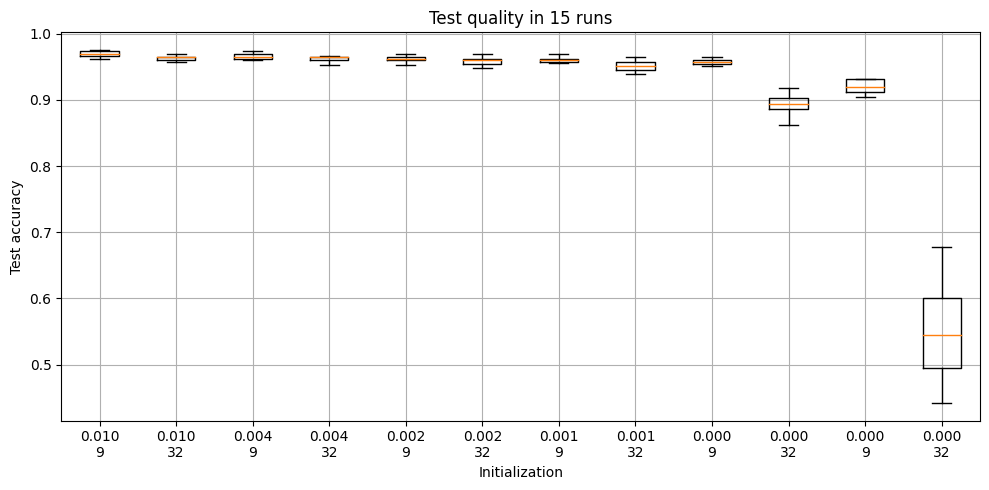

In [176]:
momentum_for_plot = [f"{opt_params['lr']:.3f}\n{opt_params['batch_size']}" for opt_params in optimizer_params]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=momentum_for_plot, showfliers=False)

ax.set_title(f"Test quality in {accs_test.shape[1]} runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

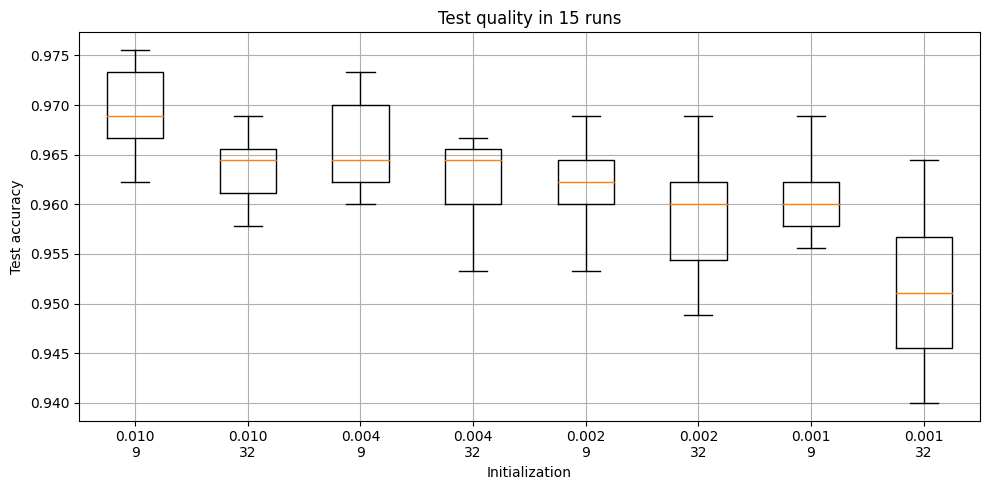

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test[:-4, :].T, labels=momentum_for_plot[:-4], showfliers=False)

ax.set_title(f"Test quality in {accs_test.shape[1]} runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

In [ ]:
optimizer = SGD
optimizer_params = []

for lr in [1e-1, 1e-2, 1e-3]:
    for batch_size in [9, 32]:
        optimizer_params.append({
            'n_iter': 250,
            'momentum': 0.9,
            'lr': lr,
            'batch_size': batch_size,
        })


accs_train = np.zeros((len(optimizer_params), 15))
accs_test = np.zeros_like(accs_train)
layer_c = 3
np.random.seed(42)


for i, opt_params in enumerate(optimizer_params):
    for j in range(accs_train.shape[1]):
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        initialize_network(network, "Kaiming")
        network, cb = train_network(
            network, 
            history=True, 
            optimizer=optimizer,
            options=opt_params,
        )
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

In [ ]:
momentum_for_plot = [f"LR = {opt_params['lr']:.3f}\nBatch size = {opt_params['batch_size']}" for opt_params in optimizer_params]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=momentum_for_plot, showfliers=False)

ax.set_title(f"Test quality in {accs_test.shape[1]} runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

In [ ]:
momentum_for_plot = [f"LR = {opt_params['lr']:.3f}\nBatch size = {opt_params['batch_size']}" for opt_params in optimizer_params]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test[3:, :].T, labels=momentum_for_plot[3:], showfliers=False)

ax.set_title(f"Test quality in {accs_test.shape[1]} runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

In [ ]:
optimizers = [SGD, SGD, "L-BFGS-B"]
optimizer_params = []

optimizer_params.append({
    'n_iter': 1_250,
    'momentum': 0.0,
    'lr': 0.039811,
    'batch_size': 8,
    'tol': 1e-4,
})

optimizer_params.append({
    'n_iter': 1_250,
    'momentum': 0.9,
    'lr': 0.01,
    'batch_size': 32,
    'tol': 1e-4,
})

optimizer_params.append({
})

accs_train = np.zeros((len(optimizer_params), 15))
accs_test = np.zeros_like(accs_train)
layer_c = 3
np.random.seed(42)


for i, (opt, opt_params) in enumerate(zip(optimizers, optimizer_params)):
    for j in range(accs_train.shape[1]):
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        initialize_network(network, "Kaiming")
        network, cb = train_network(
            network, 
            history=True, 
            optimizer=opt,
            options=opt_params,
        )
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

In [ ]:
momentum_for_plot = ["SGD", "SGD with Momentum", "L-BFGS-B"]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=momentum_for_plot, showfliers=False)

ax.set_title(f"Test quality in {accs_test.shape[1]} runs")
ax.set_xlabel("Optimizer")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

In [ ]:
optimizers = [SGD, SGD, "L-BFGS-B"]
optimizer_params = []

optimizer_params.append({
    'n_iter': 250,
    'momentum': 0.0,
    'lr': 0.1,
    'batch_size': 32,
})

optimizer_params.append({
    'n_iter': 250,
    'momentum': 0.9,
    'lr': 0.01,
    'batch_size': 32,
})

optimizer_params.append({})

accs_train = []
accs_test = []
layer_c = 3
np.random.seed(42)


for i, (opt, opt_params) in enumerate(zip(optimizers, optimizer_params)):
    network = make_network(input_size, 32, output_size, layer_c, ReLU)
    initialize_network(network, "Kaiming")
    network, cb = train_network(
        network, 
        history=True, 
        optimizer=opt,
        options=opt_params,
    )
    
    accs_train.append(cb.train_acc)
    accs_test.append(cb.test_acc)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
colors = ['r', 'g', 'b']
optimizer_labels = ["SGD", "SGD with Momentum", "L-BFGS-B"]

for train_acc, test_acc, color, label in zip(accs_train, accs_test, colors, optimizer_labels):
    ax[0].plot(train_acc, f'{color}--', label=f'{label} train')
    ax[1].plot(test_acc, f'{color}-', label=f'{label} test')

for i in range(2):
    ax[i].set_xlabel("Iteration")
    ax[i].set_ylabel("Accuracy")
    ax[i].grid(True)
    ax[i].legend()

fig.tight_layout()
plt.show()

**Выводы:**

**Задание 3. (0.1 балла)** Для отобранных в прошлом задании трёх алгоритмов ответье на вопрос: как меняются запуски для двух значений `batch_size`.

**Ответ:**

## `Бонусная часть`

Доп. эксперимент. Исследование работы SGD с неточной (усл-я Армиха-Вульфа) оптимизацией шага обучения

### `Реализация метода оптимизации (1 балл)`

Реализуйте метод оптимизации Adam и сравните его работу с SGD + momentum, проведя эксперимент, как в задании 2 (перебор гиперпараметров + кривые обучения).

In [54]:
def Adam(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    beta_momentum = kwargs['beta_momentum']
    beta_grad = kwargs['beta_grad']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']
    tolerance = kwargs['tol'] if 'tol' in kwargs else None
    tolerance = -1.0 if tolerance is None else tolerance
    eps = 1e-6
    
    if isinstance(args, tuple) and (len(args) == 1):
        args = args[0]
    
    net, X, y = args
    
    m = 0.0
    v = 0.0
    weights = x0
    nit = 0
    msg = "Max iterations reached"
    
    for i in range(1, n_iter+1):
        batch_indxs = np.array_split(np.arange(X.shape[0]), X.shape[0] // batch_size)
        loss_sum = 0.0
        
        for batch_ind in batch_indxs:
            # print(f"NEGRO")
            loss = fun(weights, (net, X[batch_ind, :], y[batch_ind]))
            grad = fun.derivative(weights, (net, X[batch_ind, :], y[batch_ind]))
            m = beta_momentum * m + (1 - beta_momentum) * grad
            v = beta_grad * v + (1 - beta_grad) * np.power(grad, 2)
            
            m_hat = m / (1 - np.power(beta_momentum, i))
            v_hat = v / (1 - np.power(beta_grad, i))
            
            delta = (m_hat / (v_hat + eps))
            print(f"Grad norm = {np.linalg.norm(delta) / len(delta)}")
            
            weights -= gamma * delta
            loss_sum += loss
        
        if callback is not None:
            callback(weights)
        
        nit += 1
        loss_sum /= len(batch_indxs)
        if loss_sum <= tolerance:
            msg = f"Convergence: loss ({loss_sum}) <= tolerance ({tolerance})"
            break
    
    res = {
        "message": msg,
        "success": True,
        "nit": nit,
        "x": weights
    }
    
    return res

In [55]:
layer_c = 3
network = make_network(input_size, 32, output_size, layer_c, ReLU)
initialize_network(network, "Kaiming")
weights = get_weights(network)

cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=(network, X_train, y_train), # args passed to fun
    method=Adam,                       # optimization method
    jac=True,                         # says that gradient is computed in fun,
    options={
        'n_iter': 1_000,
        'beta_momentum': 0.9,
        'beta_grad': 0.99,
        'lr': 12 * 1e-5,
        'batch_size': X_train.shape[0],
    },
    tol=1e-8,
    callback=cb.call,
)

res['message'], res['nit']

Grad norm = 4.196501554474134
Grad norm = 2.573210470420377
Grad norm = 2.0839486249884542
Grad norm = 1.9079376177588399
Grad norm = 1.7374175759488446
Grad norm = 1.6519860890357785
Grad norm = 1.6050825694665845
Grad norm = 1.5506450550541793
Grad norm = 1.4979233561589997
Grad norm = 1.4324480997298108
Grad norm = 1.3674555491406648
Grad norm = 1.330186081168956
Grad norm = 1.2979691565800824
Grad norm = 1.2749018996194488
Grad norm = 1.2508070774682123
Grad norm = 1.2151893618853506
Grad norm = 1.1764660398134554
Grad norm = 1.1272006469811784
Grad norm = 1.0810900912782055
Grad norm = 1.0328670025195104
Grad norm = 0.9993508922442585
Grad norm = 0.9653209582519505
Grad norm = 0.9234388756595987
Grad norm = 0.8922081153334116
Grad norm = 0.8652153308610405
Grad norm = 0.8364936341601255
Grad norm = 0.8047563680368969
Grad norm = 0.7752789034192589
Grad norm = 0.7557151364343112
Grad norm = 0.7325023374588455
Grad norm = 0.7074911855745237
Grad norm = 0.683974401739793
Grad norm = 

('Max iterations reached', 1000)

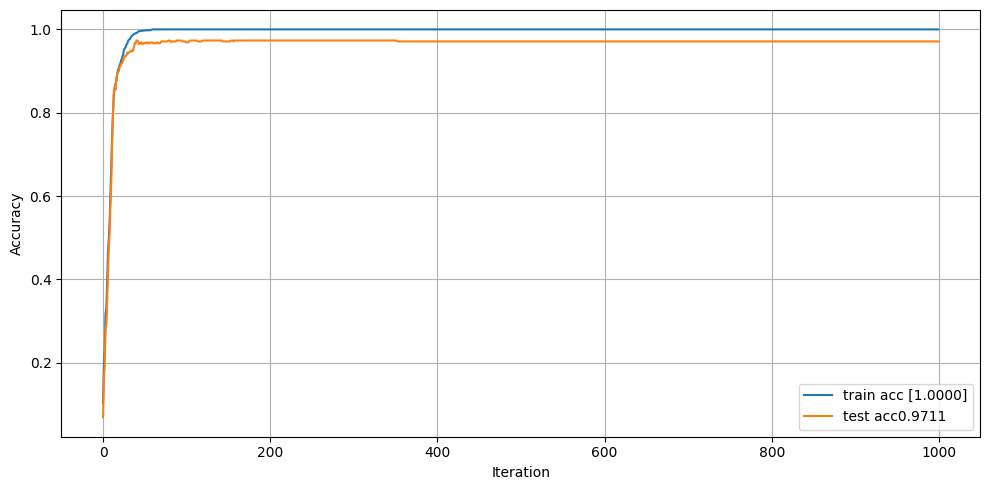

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label=f"train acc [{cb.train_acc[-1]:5.4f}]")
ax.plot(cb.test_acc, label=f"test acc{cb.test_acc[-1]:5.4f}")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

In [57]:
cb.test_acc[-1]

0.9711111111111111

### `Dropout (1 балл)`

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

In [58]:
class Dropout(Layer):
    def __init__(self, p: float = 0.5):
        super().__init__()
        self.p = p
        self.mask = None
    
    def forward(self, input: NDArray) -> NDArray:
        if self.inference_mode:
            return input
        
        mask = np.random.binomial(n=1, p=1 - self.p, size=input.shape)
        # print(mask)
        self.mask = mask / (1 - self.p)
        return input * self.mask
    
    def backward(self, grad_output: NDArray) -> Tuple[NDArray, NDArray]:
        if self.inference_mode:
            return grad_output, []
        
        return grad_output * self.mask, []
    
    def __repr__(self):
        return f"Dropout(p={self.p}, enabled={not self.inference_mode})"

In [59]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU, dropout: bool = False, dropout_p: float = 0.5):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())
            if dropout:
                network.append(Dropout(dropout_p))

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [60]:
def set_inference_mode(network: List[Layer], inference_mode: bool):
    for layer in network:
        layer.inference_mode = inference_mode

In [61]:
network = make_network(input_size, 32, output_size, layer_c, ReLU, dropout=True, dropout_p=0.2)
set_inference_mode(network, False)
weights = get_weights(network)
network

[Dense(64, 32),
 Relu(),
 Dropout(p=0.2, enabled=True),
 Dense(32, 32),
 Relu(),
 Dropout(p=0.2, enabled=True),
 Dense(32, 10),
 LogSoftmax()]

In [63]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method=SGD,                       # optimization method
    jac=True,                         # says that gradient is computed in fun,
    options={'disp': True, 'momentum': 0.9, 'batch_size': 64, 'n_iter': 5_00, 'lr': 0.005},
    tol=1e-7
)

res['nit'], res['success'], res['message']

(500, True, 'Max iterations reached')

In [64]:
set_weights(weights=res["x"], network=network)

train_NLL = NLL(forward(network, X_train), y_train)
test_NLL = NLL(forward(network, X_test), y_test)

print(f"Train NLL: {train_NLL:.7f}\t\tTest NLL: {test_NLL:.7f}")

set_inference_mode(network, True)
print(network)

train_accuracy = accuracy_score(y_true=y_train, y_pred=predict(network, X_train))
test_accuracy = accuracy_score(y_true=y_test, y_pred=predict(network, X_test))

print(f"Train accuracy: {train_accuracy:.3f}\t\tTest accuracy: {test_accuracy:.3f}")

Train NLL: 0.0197534		Test NLL: 0.3305767
[Dense(64, 32), Relu(), Dropout(p=0.2, enabled=False), Dense(32, 32), Relu(), Dropout(p=0.2, enabled=False), Dense(32, 10), LogSoftmax()]
Train accuracy: 1.000		Test accuracy: 0.973


In [67]:
p_vars = np.linspace(0, 0.9, num=10)
layer_c = 3

accs_train = np.zeros((p_vars.shape[0], 5))
accs_test = np.zeros_like(accs_train)

for i, dropout_p in enumerate(p_vars):
    for j in range(accs_train.shape[1]):
        print(f"{i=:2}\t{j=:2}\t{dropout_p=:3.2f}\t", end='')
        network = make_network(input_size, 32, output_size, layer_c, ReLU, dropout=True, dropout_p=dropout_p)
        initialize_network(network, 'Kaiming')
        set_inference_mode(network, False)
        network, cb = train_network(network, history=True, tol=1e-7, optimizer=SGD, options={'momentum': 0.9, 'batch_size': 32, 'n_iter': 500, 'lr': 0.1 * 1e-2})
        set_inference_mode(network, True)
        
        accs_train[i, j] = accuracy_score(y_true=y_train, y_pred=predict(network, X_train))
        accs_test[i, j] = accuracy_score(y_true=y_test, y_pred=predict(network, X_test))
        print(f"n_iter={len(cb.test_acc)}\ttrain acc: {accs_train[i, j]:5.4f}\ttest acc: {accs_test[i, j]:5.4f}")

i= 0	j= 0	dropout_p=0.00	n_iter=500	train acc: 1.0000	test acc: 0.9689
i= 0	j= 1	dropout_p=0.00	n_iter=500	train acc: 1.0000	test acc: 0.9689
i= 0	j= 2	dropout_p=0.00	n_iter=500	train acc: 1.0000	test acc: 0.9644
i= 0	j= 3	dropout_p=0.00	n_iter=500	train acc: 1.0000	test acc: 0.9689
i= 0	j= 4	dropout_p=0.00	n_iter=500	train acc: 1.0000	test acc: 0.9600
i= 1	j= 0	dropout_p=0.10	n_iter=500	train acc: 1.0000	test acc: 0.9733
i= 1	j= 1	dropout_p=0.10	n_iter=500	train acc: 1.0000	test acc: 0.9711
i= 1	j= 2	dropout_p=0.10	n_iter=500	train acc: 1.0000	test acc: 0.9733
i= 1	j= 3	dropout_p=0.10	n_iter=500	train acc: 1.0000	test acc: 0.9711
i= 1	j= 4	dropout_p=0.10	n_iter=500	train acc: 1.0000	test acc: 0.9756
i= 2	j= 0	dropout_p=0.20	n_iter=500	train acc: 1.0000	test acc: 0.9556
i= 2	j= 1	dropout_p=0.20	n_iter=500	train acc: 1.0000	test acc: 0.9733
i= 2	j= 2	dropout_p=0.20	n_iter=500	train acc: 1.0000	test acc: 0.9733
i= 2	j= 3	dropout_p=0.20	n_iter=500	train acc: 1.0000	test acc: 0.9733
i= 2	j


KeyboardInterrupt



In [ ]:
drop_proba_for_plot = [f"P = {p:3.2f}" for p in p_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=drop_proba_for_plot, showfliers=False)

ax.set_title(f"Test quality in {accs_test.shape[1]} runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

In [ ]:
drop_proba_for_plot = [f"P = {p:3.2f}" for p in p_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test[:-3, :].T, labels=drop_proba_for_plot[:-3], showfliers=False)

ax.set_title(f"Test quality in {accs_test.shape[1]} runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

In [ ]:
p_vars = np.linspace(0, 0.9, num=10)
layer_c = 6

accs_train = np.zeros((p_vars.shape[0], 15))
accs_test = np.zeros_like(accs_train)

for i, dropout_p in enumerate(p_vars):
    for j in range(accs_train.shape[1]):
        print(f"{i=:2}\t{j=:2}\t{dropout_p=:3.2f}\t", end='')
        network = make_network(input_size, 32, output_size, layer_c, ReLU, dropout=True, dropout_p=dropout_p)
        initialize_network(network, 'Kaiming')
        set_inference_mode(network, False)
        network, cb = train_network(network, history=True, tol=1e-7, optimizer=SGD, options={'momentum': 0.9, 'batch_size': 100, 'n_iter': 1_000, 'lr': 0.2 * 1e-2})
        set_inference_mode(network, True)
        
        accs_train[i, j] = accuracy_score(y_true=y_train, y_pred=predict(network, X_train))
        accs_test[i, j] = accuracy_score(y_true=y_test, y_pred=predict(network, X_test))
        print(f"train acc: {accs_train[i, j]:5.4f} test acc: {accs_test[i, j]:5.4f}")

In [ ]:
drop_proba_for_plot = [f"P = {p:3.2f}" for p in p_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=drop_proba_for_plot, showfliers=False)

ax.set_title(f"Test quality in {accs_test.shape[1]} runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

### `BatchNormalization (1 балл)`

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.

__Ваше решение:__

Перепишем формулу для $y_i$ в векторном виде:
$$y_i = \gamma \frac{X - \mu}{\sqrt{\sigma^2 + \varepsilon}} + \delta $$
Считаем, что $\mathcal{L} = \mathcal{L}(y(X, \gamma, \delta))$, тогда:
1. $\nabla_{\gamma} {\mathcal L} = (\nabla_{y} {\mathcal L})^T \cdot \frac{X - \mu}{\sqrt{\sigma^2 + \varepsilon}}$
2. $\nabla_{\delta} {\mathcal L} = (\nabla_{y} {\mathcal L})^T \cdot (1)_{i=1}^{n} = \sum_{i=1}^n (\nabla_{y} {\mathcal L})_i$
3. $\nabla_X{L} = \frac{\gamma}{\sqrt{\sigma^2 + \varepsilon}}\nabla_y{L}\left(E - \frac{\mathbb{I}(\mathbb{I})^T}{n} - \frac{\overline y \overline y^T}{n} \right)$

In [242]:
class BatchNormalization(Layer):
    def __init__(self, rho: float = 0.75):
        super().__init__()
        self.mu_mean = 0
        self.std_mean = 0
        self.rho = rho
        self.normed = None
        self.eps = 1e-7
        
        self.gamma = np.array([1.0])
        self.delta = np.array([0.0])
        self.params = [self.gamma, self.delta]
    
    def forward(self, input: NDArray) -> NDArray:
        # print(f"gamma = {self.gamma}\tdelta = {self.delta}")
        if self.inference_mode:
            output = self.gamma * ((input - self.mu_mean) / self.std_mean) + self.delta
            return output
            
        mu = np.mean(input, axis=0, keepdims=True)
        std = np.std(input, axis=0, keepdims=True) + self.eps
        
        self.mu_mean = (1 - self.rho) * self.mu_mean + self.rho * mu
        self.std_mean = (1 - self.rho) * self.std_mean + self.rho * std
        
        self.input = input
        self.normed = (input - mu) / std
        self.bathc_mu = mu
        self.batch_std = std
        output = self.gamma * self.normed + self.delta
        
        return output
    
    def backward(self, grad_output: NDArray) -> Tuple[NDArray, NDArray]:
        d_loss_d_gamma = np.sum(grad_output * self.normed, axis=0, keepdims=True)
        d_loss_d_delta = np.sum(grad_output, axis=0, keepdims=True)

        loss_dot_y = np.sum(grad_output * (self.gamma * self.normed + self.delta), axis=0, keepdims=True)
        loss_dot_1 = d_loss_d_delta
        
        n = grad_output.shape[0]
        # print(f"{loss_dot_1.shape=}\n{loss_dot_y.shape=}\n{self.normed.shape=}")
        d_loss_d_x = (grad_output - (1 / n) * (loss_dot_1 + (self.gamma * self.normed + self.delta) * loss_dot_y))
        d_loss_d_x = (self.gamma / self.batch_std) * d_loss_d_x
        
        # print(f"{d_loss_d_x.shape=}\t{d_loss_d_gamma.shape=}\t{d_loss_d_delta.shape=}")
        
        return d_loss_d_x, [np.sum(d_loss_d_gamma), np.sum(d_loss_d_delta)]
    
    def __repr__(self):
        return f"BatchNormalization()"

In [232]:
batchnorm = BatchNormalization()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

batchnorm.inference_mode = False
batchnorm.forward(points)

numeric_grads = eval_numerical_gradient(lambda x: np.sum((batchnorm.forward(x)) ** 4), points)
res = batchnorm.forward(points)
batchnorm_grads, params = batchnorm.backward(4 * (res ** 3))

batchnorm_grads - numeric_grads

assert np.allclose(numeric_grads, batchnorm_grads, rtol=1e-3, atol=0)

In [233]:
batchnorm = BatchNormalization()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

batchnorm.inference_mode = False
batchnorm.forward(points)

def foo(gamma):
    old_gamma = batchnorm.gamma
    batchnorm.gamma = gamma
    val = np.sum((batchnorm.forward(points)) ** 4)
    batchnorm.gamma = old_gamma
    return val

numeric_grads = eval_numerical_gradient(foo, np.array([1.0]))
res = batchnorm.forward(points)
batchnorm_grads, params = batchnorm.backward(4 * (res ** 3))

# batchnorm_grads - numeric_grads

numeric_grads - params[0]

# assert np.allclose(numeric_grads, batchnorm_grads, rtol=1e-3, atol=0)

array([8.6277737e-08])

In [234]:
batchnorm = BatchNormalization()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

batchnorm.inference_mode = False
batchnorm.forward(points)

def foo(delta):
    old_delta = batchnorm.delta
    batchnorm.delta = delta
    val = np.sum((batchnorm.forward(points)) ** 4)
    batchnorm.delta = old_delta
    return val

numeric_grads = eval_numerical_gradient(foo, np.array([0.0]))
res = batchnorm.forward(points)
batchnorm_grads, params = batchnorm.backward(4 * (res ** 3))

# batchnorm_grads - numeric_grads

numeric_grads - params[1]

# assert np.allclose(numeric_grads, batchnorm_grads, rtol=1e-3, atol=0)

array([-1.0658141e-14])

In [235]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]
    
    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)
    
    Do not forget to set weights of the network!
    """
    network, X, y = args
    
    set_weights(weights, network)
    
    activations = forward(network, X)
    loss = NLL(activations, y)
    
    weights_grad_arrays = []
    
    d_loss_d_input = grad_NLL(activations, y)
    for layer in reversed(network):
        d_loss_d_input, d_loss_d_layer = layer.backward(d_loss_d_input)
        if isinstance(layer, Dense):
            weights_grad_arrays.append(np.sum(d_loss_d_layer[1], axis=0).ravel().tolist())
            weights_grad_arrays.append(np.sum(d_loss_d_layer[0], axis=0).ravel().tolist())
        elif isinstance(layer, BatchNormalization):
            weights_grad_arrays.append([d_loss_d_layer[1]])
            weights_grad_arrays.append([d_loss_d_layer[0]])
        else:
            pass
    
    weights_grad_arrays.reverse()
    weights_grad = []
    for wg in weights_grad_arrays:
        weights_grad += wg
    
    # print(f"Mean abs grad value: {np.mean(np.abs(weights_grad))}\tMax abs grad value: {np.max(np.abs(weights_grad))}")
    # print(f"Loss = {loss}")
    
    # print(f"{len(weights_grad)=}")
    
    return loss, np.array(weights_grad)

In [236]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU, dropout: bool = False, dropout_p: float = 0.5, batch_norm: bool = False):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())
            if batch_norm:
                network.append(BatchNormalization())
            if dropout:
                network.append(Dropout(dropout_p))

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [243]:
network = make_network(input_size, 32, output_size, layer_c, ReLU, dropout=False, dropout_p=0.1, batch_norm=True)
set_inference_mode(network, False)
weights = get_weights(network)
network

[Dense(64, 32),
 Relu(),
 BatchNormalization(),
 Dense(32, 32),
 Relu(),
 BatchNormalization(),
 Dense(32, 10),
 LogSoftmax()]

In [244]:
network[2].params

[array([1.]), array([0.])]

In [245]:
# cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
set_inference_mode(network, False)
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method=SGD,                       # optimization method
    jac=True,                         # says that gradient is computed in fun,
    options={'disp': True, 'momentum': 0.9, 'batch_size': 100, 'n_iter': 1_000, 'lr': 0.05},
    tol=1e-7,
    # callback=cb.call
)

res['nit'], res['success'], res['message']

(1000, True, 'Max iterations reached')

In [246]:
set_weights(weights=res["x"], network=network)

train_NLL = NLL(forward(network, X_train), y_train)
set_inference_mode(network, True)
print(network)
test_NLL = NLL(forward(network, X_test), y_test)

print(f"Train NLL: {train_NLL:.7f}\t\tTest NLL: {test_NLL:.7f}")


train_accuracy = accuracy_score(y_true=y_train, y_pred=predict(network, X_train))
test_accuracy = accuracy_score(y_true=y_test, y_pred=predict(network, X_test))

print(f"Train accuracy: {train_accuracy:.3f}\t\tTest accuracy: {test_accuracy:.3f}")

[Dense(64, 32), Relu(), BatchNormalization(), Dense(32, 32), Relu(), BatchNormalization(), Dense(32, 10), LogSoftmax()]
Train NLL: 1.9284110		Test NLL: 2.0499594
Train accuracy: 0.286		Test accuracy: 0.222
